- 타겟이 연속형이기 때문에 회귀를 적용해야한다

In [1]:
import pandas as pd
dataset = pd.read_csv('/content/california_housing_train.csv')

In [2]:
print(dataset)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [4]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df = dataset

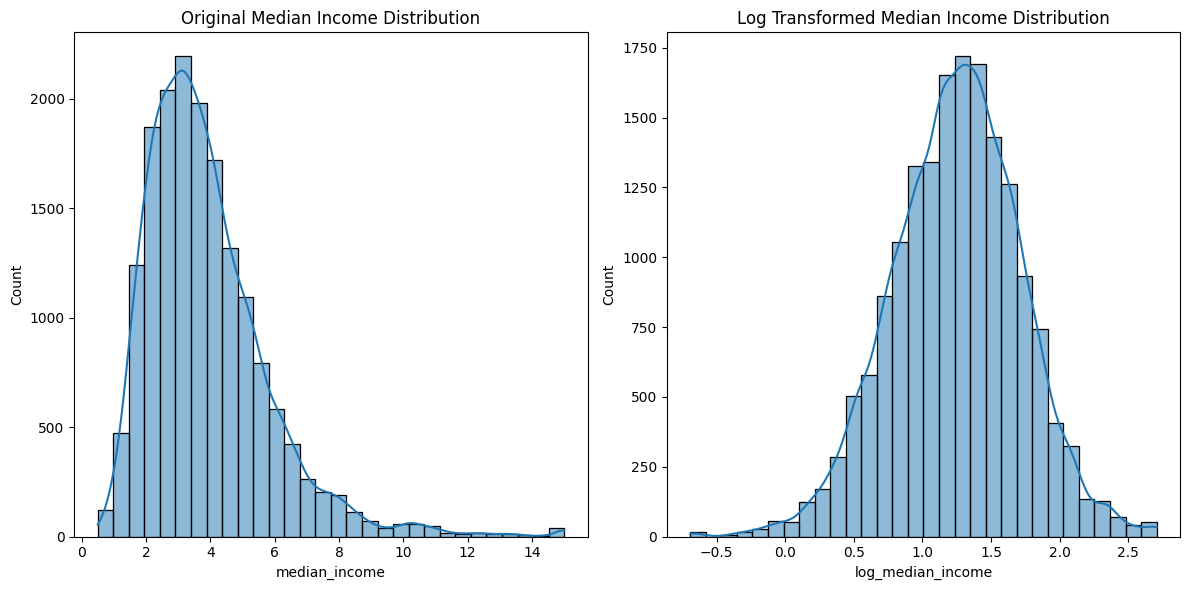

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 로그 변환 수행
df['log_median_income'] = np.log(df['median_income'])

# 원래 데이터와 로그 변환된 데이터의 분포 비교를 위한 시각화
plt.figure(figsize=(12, 6))

# 원래 데이터의 분포 (median_income)
plt.subplot(1, 2, 1)
sns.histplot(df['median_income'], kde=True, bins=30)
plt.title('Original Median Income Distribution')

# 로그 변환된 데이터의 분포 (log_median_income)
plt.subplot(1, 2, 2)
sns.histplot(df['log_median_income'], kde=True, bins=30)
plt.title('Log Transformed Median Income Distribution')

plt.tight_layout()
plt.show()

In [7]:
# 로그 변환된 데이터 확인
df[['median_income', 'log_median_income']].head()

,median_income,log_median_income
0,1.4936,0.401189
1,1.8200,0.598837
2,1.6509,0.501321
3,3.1917,1.160554
4,1.9250,0.654926


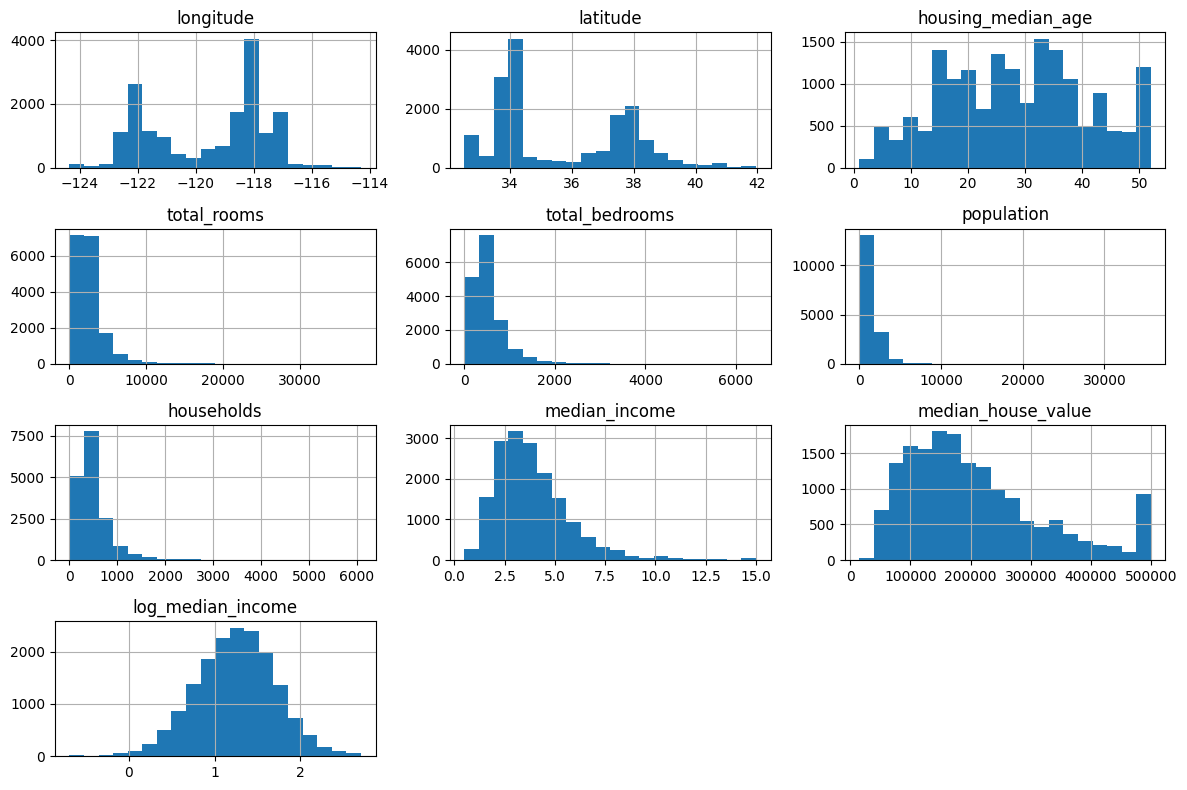

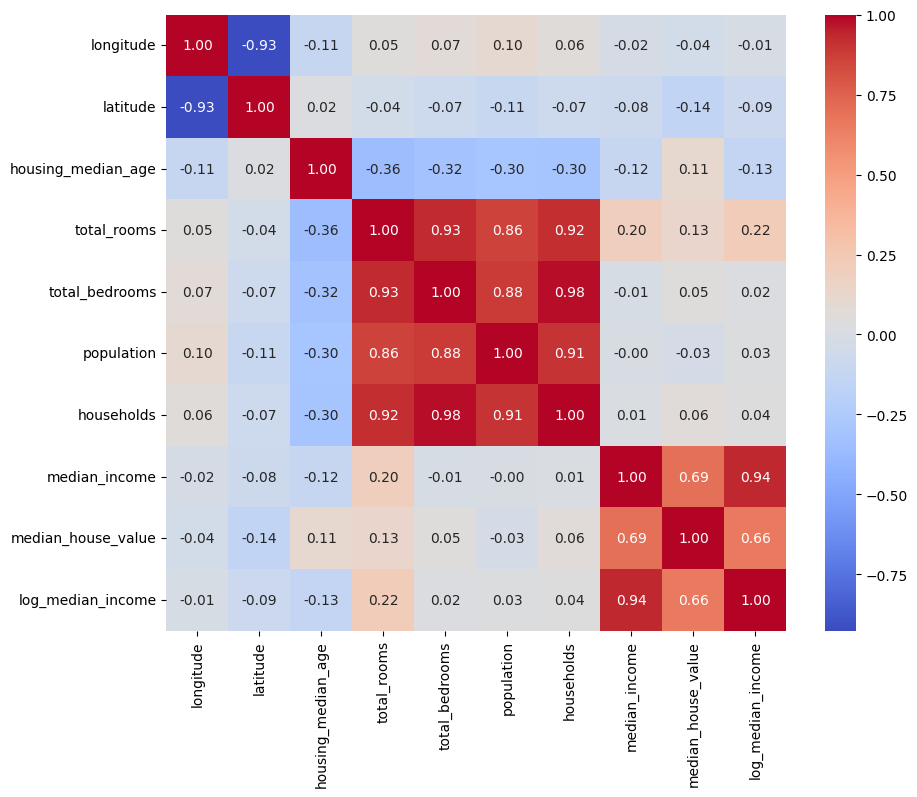

In [8]:
# 데이터 분포 확인을 위한 히스토그램
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# 상관 관계 분석을 위한 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 독립변수와 종속변수 분리
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R² Score:', r2)

MSE: 4737434289.781313
R² Score: 0.6321466777879103


In [12]:
# 선형 회귀 모델의 계수 출력
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# 계수의 중요도 해석
# 예: 'median_income'의 계수가 높고 유의미하다면, 이 변수는 주택 가격에 큰 영향을 미치는 것으로 해석할 수 있음

                     Coefficient
longitude          -43424.007954
latitude           -43150.846969
housing_median_age   1154.366061
total_rooms            -9.232896
total_bedrooms        123.505965
population            -37.190032
households             41.019163
median_income       40865.386339
log_median_income   -1331.226269


In [13]:
from sklearn.preprocessing import StandardScaler

# 표준화를 위한 객체 생성
scaler = StandardScaler()

# 독립변수에 대한 스케일링 수행
X_scaled = scaler.fit_transform(X)

# 스케일링된 데이터로 학습 데이터와 테스트 데이터 분리
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# 스케일링된 데이터로 선형 회귀 모델 재학습
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# 스케일링 전후 모델 성능 비교
y_pred = model.predict(X_test)
y_pred_scaled = model_scaled.predict(X_test_scaled)

mse_before = mean_squared_error(y_test, y_pred)
mse_after = mean_squared_error(y_test, y_pred_scaled)

print('MSE before scaling:', mse_before)
print('MSE after scaling:', mse_after)

MSE before scaling: 4737434289.781313
MSE after scaling: 4737434289.781304
